In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake 
import os
from scipy.optimize import minimize
import tqdm

Reading outline from icepack database


2024-05-14 02:35:01.460842: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 02:35:01.461254: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 02:35:01.463464: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 02:35:01.490133: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 02:35:02.046376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.01, read_mesh = False, drichlet_ids = [2,3,4], lcar = 3.5e3)

Reading outline from icepack database


In [3]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True, C = 'constant')

Reading velocity from specified file
C0 is computed using driving stress


In [7]:
u =  invert_pig.simulation()
firedrake.assemble(invert_pig.loss_functional(u))

245690.43799711298

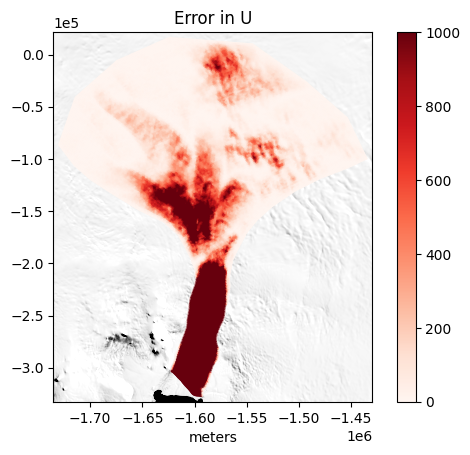

In [8]:
invert_pig.plot_u_error(u, vmax = 1000)

In [6]:
# invert_pig.compute_C_driving_stress()
# invert_pig.C = firedrake.Constant(0)
# invert_pig.θ = firedrake.Constant(0)
# u =  invert_pig.simulation()
# invert_pig.plot_C_total(vmin=None, vmax=0.1)
# invert_pig.plot_streamline_u(u)
# invert_pig.compute_C()
# print(firedrake.assemble(invert_pig.loss_functional(u)))

In [49]:
invert_pig.compute_C_theta_ML_regress(filename = 'model_7', half = False, flip = False, use_driving_stress = False)
u =  invert_pig.simulation()

  1/663 ━━━━━━━━━━━━━━━━━━━━ 1:01 92ms/step

/home/firedrake/firedrake/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/firedrake/firedrake/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/firedrake/firedrake/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [50]:
firedrake.assemble(invert_pig.loss_functional(u))
#6 variables : 381
#7 variables : 388
#7 variable split: 818.3298355786566
#7 variable split2: 701.5208384586372

388.0113866436965

In [51]:
# def plot_C0(vmin=-2, vmax=2):
#     """Plot C"""
#     fig, axes = invert_pig.plot_bounded_antarctica()
#     colors = firedrake.tripcolor(
#         invert_pig.C0, axes=axes, vmin=vmin, vmax=vmax
#     )
#     fig.colorbar(colors);
#     plt.title("C")
#     plt.show()
# plot_C0(vmin=None, vmax=0.1)

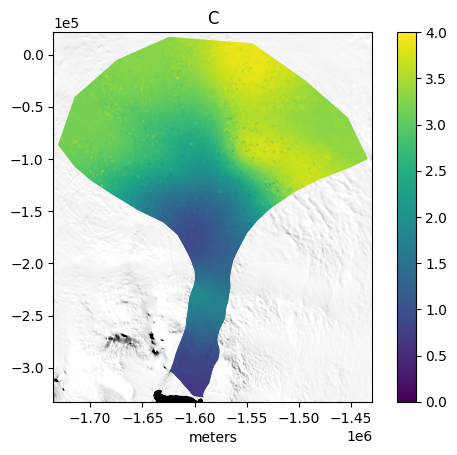

In [52]:
invert_pig.plot_C(vmin=0, vmax=4)

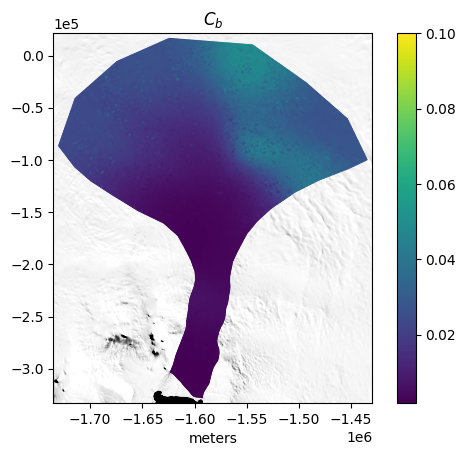

In [53]:
invert_pig.plot_C_total(vmin=None, vmax=0.1)

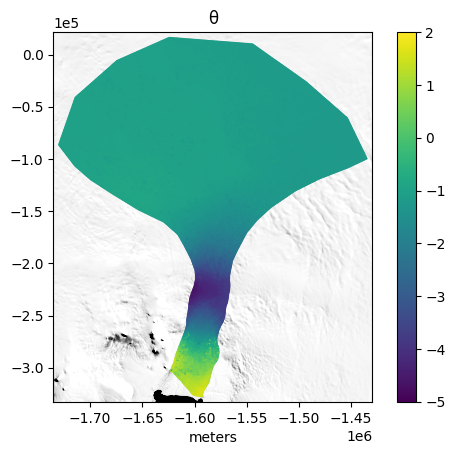

In [54]:
invert_pig.plot_theta(vmin = -5, vmax = 2)

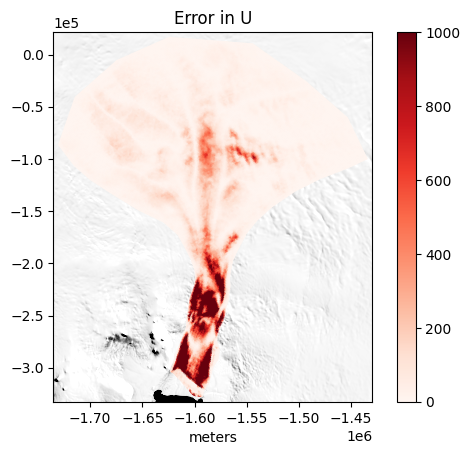

In [55]:
invert_pig.plot_u_error(u, vmax = 1000)

In [10]:
# final_time = 2.0
# num_steps = 200 
# final_time = 4.5
# num_steps = 450
# final_time = 1.0
# num_steps = 100
final_time = 2.0
num_steps = 200
dt = final_time / num_steps
for step in tqdm.trange(num_steps):
    h,s = invert_pig.simulation_prognostic(u, dt)
    #invert_pig.compute_C_theta_ML_regress(filename = 'model')
    u =  invert_pig.simulation(u)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [07:57<00:00,  2.39s/it]


In [11]:
#folder_path = "completed/24/"
folder_path = "completed/24/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


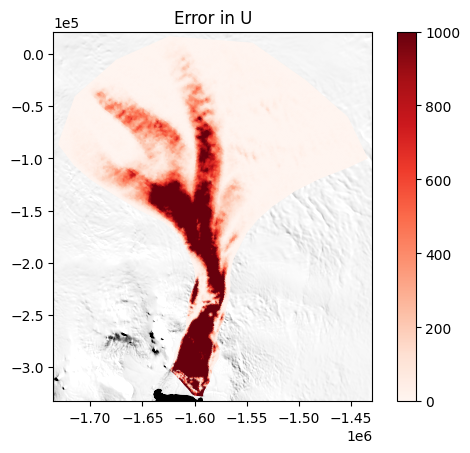

In [12]:
invert_pig.plot_u_error(u, vmax = 1000)

In [13]:
firedrake.assemble(invert_pig.loss_functional(u))

1293.554186247072

In [15]:
# model_6
# no update C theta: 1010.1404986130862
# update C theta: 2760
# model 7
# no update C theta: 1030.2524784678258
# model 7 split
# no update C theta: 1176.3867388443534
# model 7 split2
# no update C theta: 1293.554186247072